In [22]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pathlib import Path

In [3]:
HISTORY_DIR = Path('../results/')
filename = '4W_imu_servo_2024-05-02-17-48-56.json'

In [4]:
with open(HISTORY_DIR / filename) as fp:
    results = json.load(fp)

In [6]:
results.keys()

dict_keys(['1', '2'])

In [8]:
df = pd.DataFrame(results)
df

,1,2
train_loss,"[1.8756118501935686, 1.6059261049543108, 1.325...","[1.995523452758789, 1.5346356800624303, 1.4524..."
val_loss,"[2.2852203845977783, 2.450303792953491, 2.2253...","[2.263157844543457, 2.312286376953125, 2.24205..."
accuracy,"[0.125, 0.125, 0.17857142857142858, 0.32142857...","[0.10714285714285714, 0.17857142857142858, 0.1..."


In [29]:
res_array = np.array(df.loc['accuracy'].values.tolist()).T
x = np.arange(1, res_array.shape[0] + 1)
average_acc = res_array.mean(axis=1)
std_dev_acc = res_array.std(axis=1)
ci = 2 * std_dev_acc

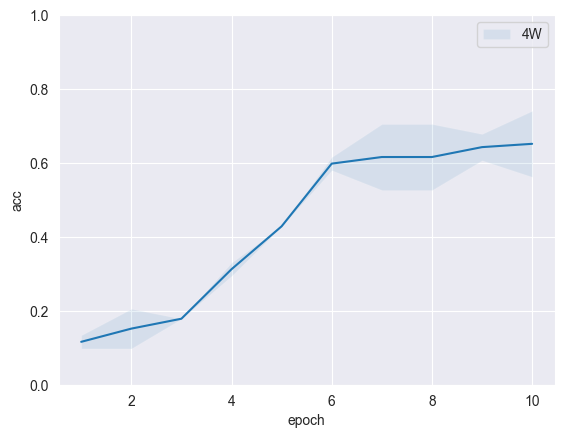

In [34]:
fig, ax = plt.subplots()
ax.plot(x, average_acc)
ax.fill_between(x, (average_acc - ci), (average_acc + ci), alpha=.1, label='4W')
ax.set_ylim(0, 1)
ax.set_xlabel('epoch')
ax.set_ylabel('acc')
plt.legend()